# **Speech Processing Lab 7**

Rishabh Tripathi (180030036)

## **AIM**
1. To understand the limitation of DTFT for the spectral analysis of speech.
2. To understand the development of short-term Fourier transform (STFT) representation.
3. To understand the difference in the nature of linear and log magnitude spectra.
4. To understand the difference among the spectra of voiced, unvoiced and silence regions of speech.
5. To plot the STFT of a speech signal.
6. To understand the difference between true and convolved spectra.
7. To understand the effect of rectangular, Hamming and Hanning window functions on short term spectral analysis.
8. To understand the effect of frame size on short term spectral analysis


In [ ]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq,fftshift
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Speech\ Processing\ Lab/Lab\ 7

/content/drive/MyDrive/Speech Processing Lab/Lab 7


## **Theory**
As we know that the speech signals are non-stationary in nature, therefore we cannot capture the time varying nature of the frequency content by taking the DTFT of the entire speech signal. Hence, the short term Fourier transform is essential for speech processing.

### **Discrete Time Fourier Transform**
If $x[n]$,a discrete time signal, then its DTFT is given by

$X(\omega) = \sum_{n=-\infty}^{\infty}x[n] e^{-j\omega n}$

### **Discrete Fourier transform**
$X(w)$ is continuous function of frequency and hence cannot be computed on a digital signal processor or machine. To make it possible discrete version of the DTFT termed as discrete Fourier transform (DFT) is defined where DFT is obtained by uniformly sampling $X(w)$.

$X[k] = X(\omega_{k})$

$\omega_{k} = 2\pi k$

$k = 0, 1, ..., N-1$

$N \geq length(x[n])$


## **Problem A**
DTFT of and its limitation:
1. Plot the linear and log magnitude spectrum for the entire speech. 
2. Plot log-magnitude spectrum of voiced, unvoiced and silence regions in the recorded speech and explain the difference between log-spectrum of all three cases.
3. Comment on the limitation of DTFT.


### **Procedure**
1. Record the words "speech signal" using WaveSurfer (16 KHz sampling rate and 16 bits resolution) and save the .wav file in Google drive.
2. Load the audio file using Librosa library with sampling rate of 16000.
3. Use the below defined functions to plot the waveform and the magnitude spectrum of the respective sounds.

In [ ]:
def wave_plot(sound, time, sound_name):
    plt.figure(figsize=(15,5))
    plt.plot(time, sound)
    plt.title("Time Domain Plot of sound "+ "/" + sound_name + "/")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

In [ ]:
def plot_spectrum(sound, sound_name, type='lin'):
    
    # Getting the Discrete Fourier Transform of the sound
    total_len = sound.shape[0]
    audio_fft = fft(sound)/total_len

    f_array = fftfreq(total_len, 1/fs)
    
    if type == 'log':
        plt.figure(figsize=(15,5))
        plt.plot(f_array[0:total_len//2], 2*np.abs(audio_fft[0:total_len//2]))
        plt.title("Magnitude Spectrum of "+ "/" + sound_name + "/")
        plt.yscale('log')
        plt.xlim((0, 8000))
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')
        plt.show()

    if type == 'lin':
        plt.figure(figsize=(15,5))
        plt.plot(f_array[0:total_len//2], 2*np.abs(audio_fft[0:total_len//2]))
        plt.title("Magnitude Spectrum of "+ "/" + sound_name + "/")
        plt.xlim((0, 8000))
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')
        plt.show()

    if type == 'none':
        return f_array[0:total_len//2], 2*np.abs(audio_fft[0:total_len//2])

In [ ]:
# Loading the audio file
audio, fs = librosa.load("speech_signal.wav", sr = 16000)
t = np.arange(0, audio.shape[0]/fs, 1/fs)

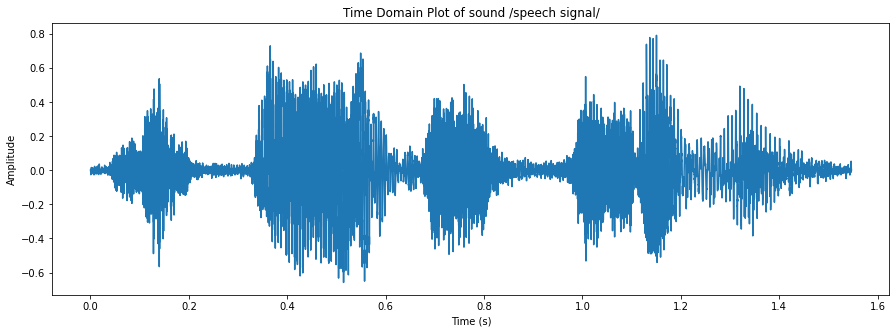

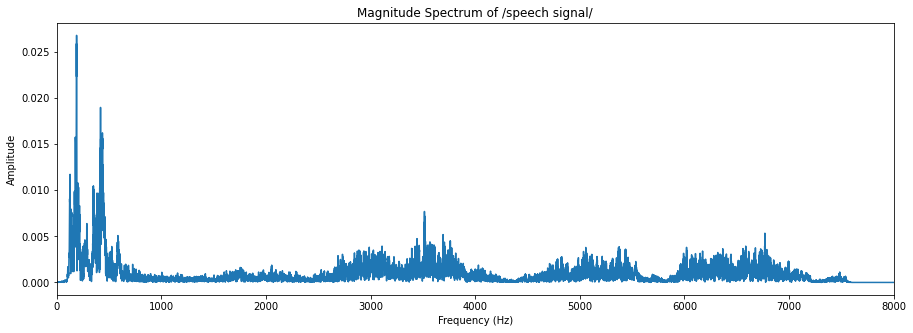

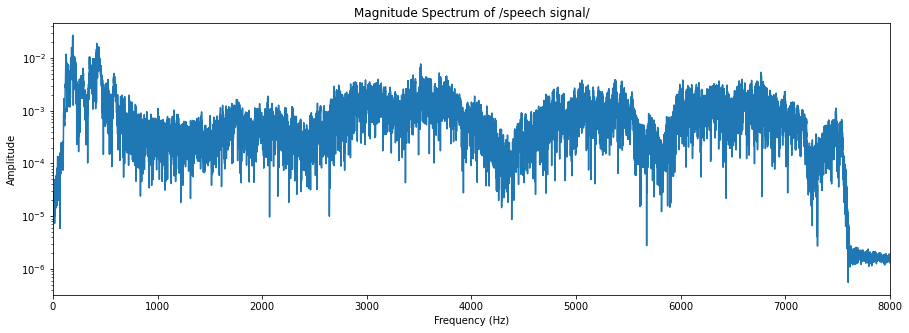

In [ ]:
# Plot the waveform, linear and log magnitude spectrum of entire sound
wave_plot(audio, t, "speech signal")
plot_spectrum(audio, "speech signal", type='lin')
plot_spectrum(audio, "speech signal", type='log')

In [ ]:
# We choose 3 regions for extracting 3 sounds:
# /ee/ sound => 0.353s - 0.541s
# /ss/ sound => 0.989s - 1.104s
# silence => 0.239s - 0.326s

# frame_size = 30 ms
ee = audio[int((0.353)*fs):int((0.541)*fs)]
ss = audio[int((0.989)*fs):int((1.104)*fs)]
silence = audio[int((0.239)*fs):int((0.326)*fs)]
t_ee = np.arange(0, ee.shape[0]/fs, 1/fs)
t_ss = np.arange(0, ss.shape[0]/fs, 1/fs)
t_silence = np.arange(0, silence.shape[0]/fs, 1/fs)

In [ ]:
f_ee, fft_ee = plot_spectrum(ee, 'ee', type='none')
f_ss, fft_ss = plot_spectrum(ss, 'ss', type='none')
f_silence, fft_silence = plot_spectrum(silence, 'silence', type='none')

[None, Text(0, 0.5, 'Amplitude'), Text(0.5, 0, 'Frequency (Hz)')]

<Figure size 720x720 with 0 Axes>

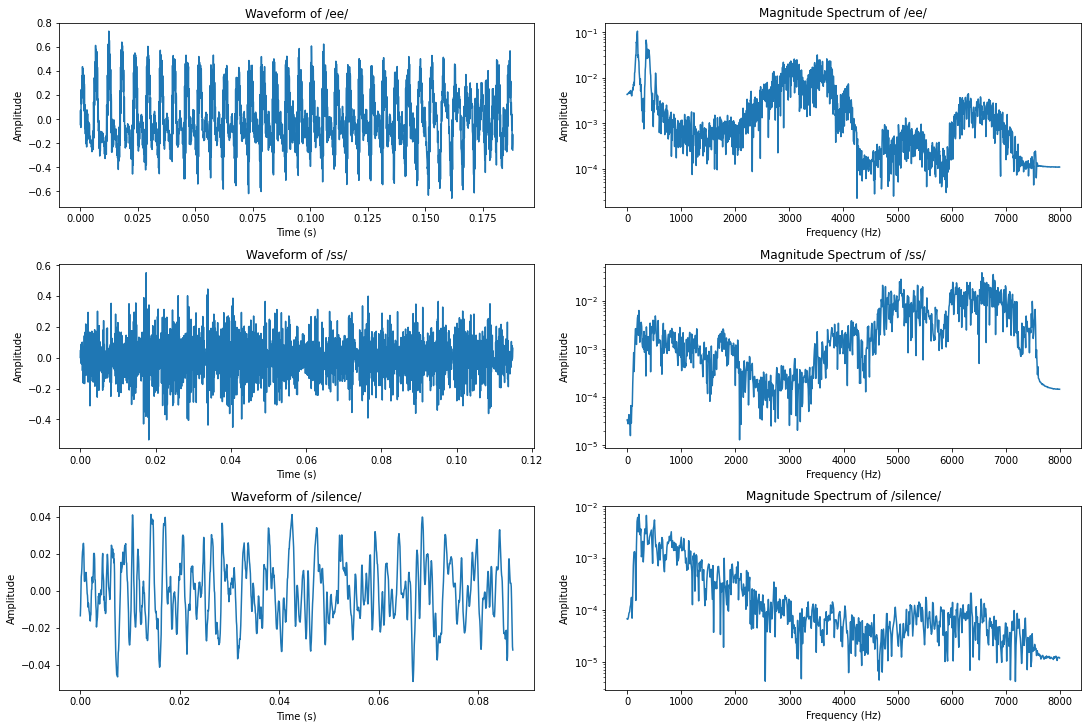

In [ ]:
plt.figure(figsize=(10,10))
fig, axs = plt.subplots(3, 2, figsize=(15,10), constrained_layout=True)
axs[0, 0].plot(t_ee, ee)
axs[0, 0].set_title('Waveform of /ee/')
axs[0, 0].set(xlabel = 'Time (s)', ylabel = 'Amplitude')
axs[0, 1].plot(f_ee, fft_ee)
axs[0, 1].set_title('Magnitude Spectrum of /ee/')
axs[0, 1].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude', yscale = 'log')

axs[1, 0].plot(t_ss, ss)
axs[1, 0].set_title('Waveform of /ss/')
axs[1, 0].set(xlabel = 'Time (s)', ylabel = 'Amplitude')
axs[1, 1].plot(f_ss, fft_ss)
axs[1, 1].set_title('Magnitude Spectrum of /ss/')
axs[1, 1].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude', yscale = 'log')

axs[2, 0].plot(t_silence, silence)
axs[2, 0].set_title('Waveform of /silence/')
axs[2, 0].set(xlabel = 'Time (s)', ylabel = 'Amplitude')
axs[2, 1].plot(f_silence, fft_silence)
axs[2, 1].set_title('Magnitude Spectrum of /silence/')
axs[2, 1].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude', yscale = 'log')

### **Observations**
1. By observing the magnitude specrtum of the entire speech signal, we can see that it contains a wide range of frequencies at significant power. This is because DTFT will average out all the frequency content over the entire signal.
2. The DTFT of the voiced sound shows expected behaviour with higher magnitude in the low freqeuncy. Similarly the unvoiced sound behaves as expected and has higher magnitude in relatively higher frequencies.
3. The silence region has a lower energy overall as compared to the other 2 sounds.
4. The limitation of DTFT is that it does not tell us when a particular frequency component is present, that is, the timing information is completely lost.

## **Problem B**
Need for Short Time Fourier Transform(STFT):
1. How can you solve the above problem using STFT? Plot the STFT of one speech frame at the centre of above three regions. Write your observations.


### **Procedure**
1. We get the time stamps of the 3 sound regions: /ee/, /ss/, and silence. (Using WaveSurfer)
2. Get a 30 ms segment of each sound around the centre time stamps.
3. Use the plot_spectrum() function to get the DFT of the sound segments.
4. Plot all 3 waveforms along with the magnitude spectrums.

In [ ]:
# We choose 3 centre time stamps for extracting frames of same size:
# /ee/ sound => 0.437 s
# /ss/ sound => 1.033 s
# silence => 0.900 s

# frame_size = 30 ms
ee = audio[int((0.437-0.015)*fs):int((0.437+0.015)*fs)]
ss = audio[int((1.033-0.015)*fs):int((1.033+0.015)*fs)]
silence = audio[int((0.900-0.015)*fs):int((0.900+0.015)*fs)]
t_ee = np.arange(0, ee.shape[0]/fs, 1/fs)
t_ss = np.arange(0, ss.shape[0]/fs, 1/fs)
t_silence = np.arange(0, silence.shape[0]/fs, 1/fs)

In [ ]:
f_ee, fft_ee = plot_spectrum(ee, 'ee', type='none')
f_ss, fft_ss = plot_spectrum(ss, 'ss', type='none')
f_silence, fft_silence = plot_spectrum(silence, 'silence', type='none')

[None, Text(0, 0.5, 'Amplitude'), Text(0.5, 0, 'Frequency (Hz)')]

<Figure size 720x720 with 0 Axes>

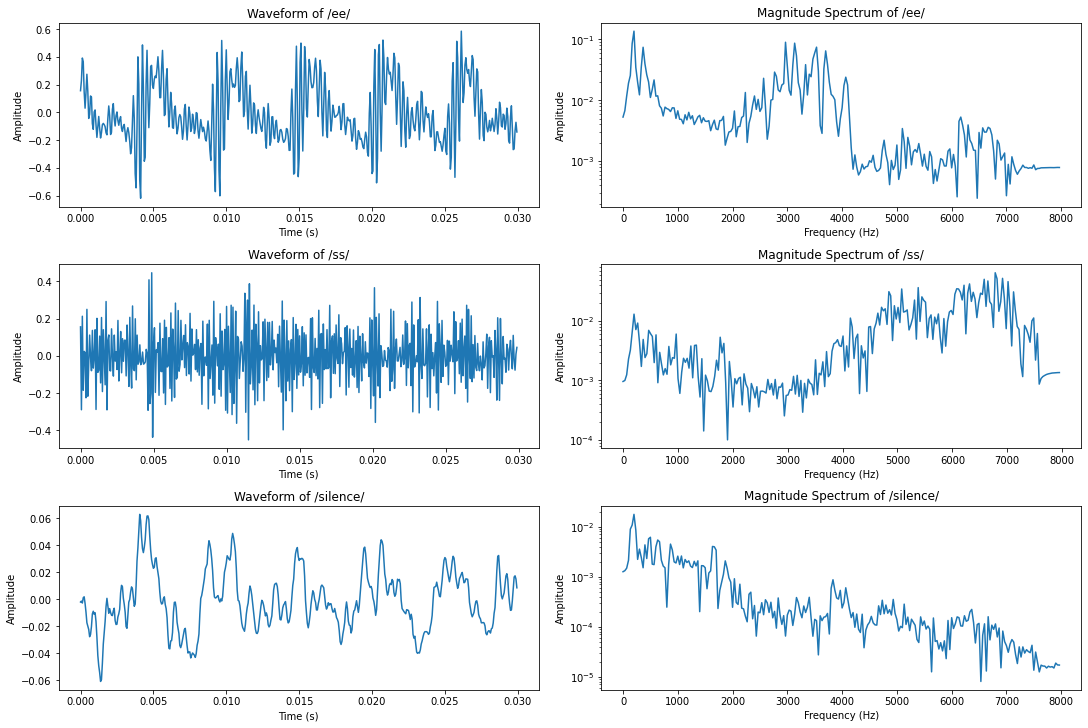

In [ ]:
plt.figure(figsize=(10,10))
fig, axs = plt.subplots(3, 2, figsize=(15,10), constrained_layout=True)
axs[0, 0].plot(t_ee, ee)
axs[0, 0].set_title('Waveform of /ee/')
axs[0, 0].set(xlabel = 'Time (s)', ylabel = 'Amplitude')
axs[0, 1].plot(f_ee, fft_ee)
axs[0, 1].set_title('Magnitude Spectrum of /ee/')
axs[0, 1].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude', yscale = 'log')

axs[1, 0].plot(t_ss, ss)
axs[1, 0].set_title('Waveform of /ss/')
axs[1, 0].set(xlabel = 'Time (s)', ylabel = 'Amplitude')
axs[1, 1].plot(f_ss, fft_ss)
axs[1, 1].set_title('Magnitude Spectrum of /ss/')
axs[1, 1].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude', yscale = 'log')

axs[2, 0].plot(t_silence, silence)
axs[2, 0].set_title('Waveform of /silence/')
axs[2, 0].set(xlabel = 'Time (s)', ylabel = 'Amplitude')
axs[2, 1].plot(f_silence, fft_silence)
axs[2, 1].set_title('Magnitude Spectrum of /silence/')
axs[2, 1].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude', yscale = 'log')

### **Observations**
1. We can solve the above problem using STFT as we can ensure quasi-stationarity when we take a small frame (20-30 ms) at a time and plot its spectrum.
2. The above plots show that with a rectangular window of size 30 ms, we can obtain the spectrum of the required sounds. 

## **Problem C**
Concept of true and convolved spectra:
1. Create a sine wave of 200Hz and compute DTFT of the whole signal. Now also compute the STFT  by taking a 20-30ms short term segment of the sine wave. Explain your observation and difference between the true and convolved spectrum.


### **Procedure**
1. Generate a 230 ms and a 23 ms long sine wave of 200 Hz using numpy.
2. Get the DFT of these signals using the above defined function.
3. Plot the waveforms and the magnitude spectra of the signals.

In [ ]:
# Generating 200 Hz sine wave of duration 230 ms
time = np.arange(0, 0.230, 1/fs)
sine_wave = np.sin(2*np.pi*200*time)

# Generating 200 Hz sine wave of duration 23 ms
# We choose 0.023s as it is not an integer multiple of (1/200)s = 0.005s
# So, we will have discontinuities when we calculate the DTFT
time_short = np.arange(0, 0.023, 1/fs)
sine_wave_short = np.sin(2*np.pi*200*time_short)

In [ ]:
f_sine, fft_sine = plot_spectrum(sine_wave, "sine", type='none')
f_sine_short, fft_sine_short = plot_spectrum(sine_wave_short, "sine", type='none')

[None, Text(0, 0.5, 'Amplitude'), Text(0.5, 0, 'Frequency (Hz)')]

<Figure size 720x720 with 0 Axes>

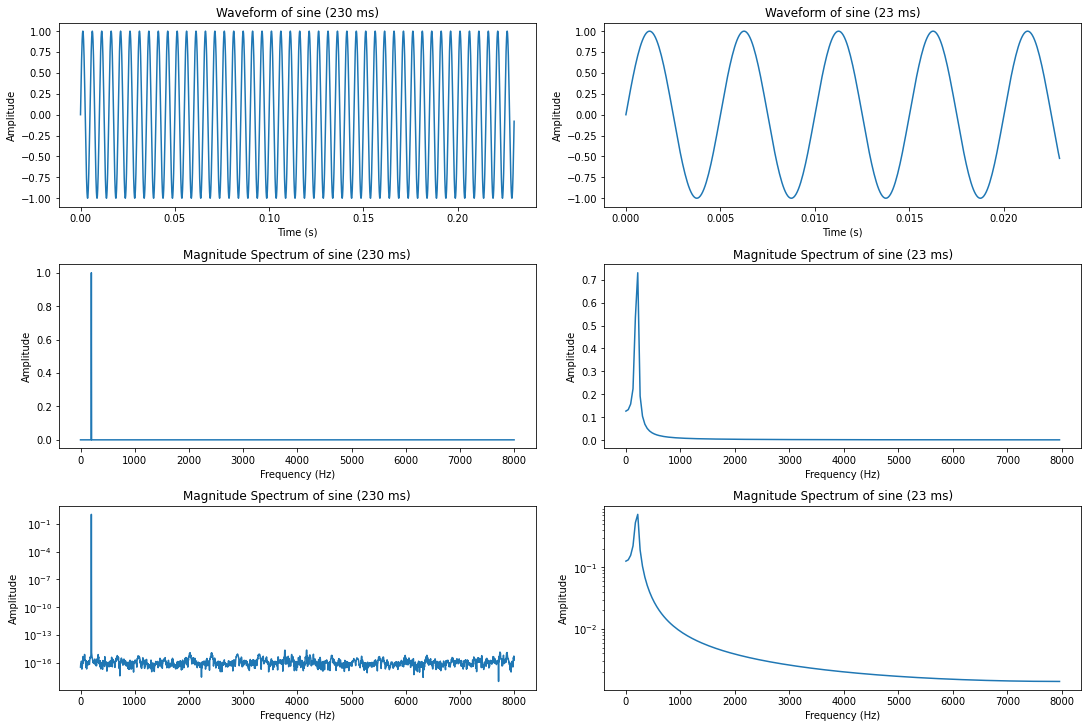

In [ ]:
plt.figure(figsize=(10,10))
fig, axs = plt.subplots(3, 2, figsize=(15,10), constrained_layout=True)
axs[0, 0].plot(time, sine_wave)
axs[0, 0].set_title('Waveform of sine (230 ms)')
axs[0, 0].set(xlabel = 'Time (s)', ylabel = 'Amplitude')
axs[0, 1].plot(time_short, sine_wave_short)
axs[0, 1].set_title('Waveform of sine (23 ms)')
axs[0, 1].set(xlabel = 'Time (s)', ylabel = 'Amplitude')

axs[1, 0].plot(f_sine, fft_sine)
axs[1, 0].set_title('Magnitude Spectrum of sine (230 ms)')
axs[1, 0].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude')
axs[1, 1].plot(f_sine_short, fft_sine_short)
axs[1, 1].set_title('Magnitude Spectrum of sine (23 ms)')
axs[1, 1].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude')

axs[2, 0].plot(f_sine, fft_sine)
axs[2, 0].set_title('Magnitude Spectrum of sine (230 ms)')
axs[2, 0].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude', yscale = 'log')
axs[2, 1].plot(f_sine_short, fft_sine_short)
axs[2, 1].set_title('Magnitude Spectrum of sine (23 ms)')
axs[2, 1].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude', yscale = 'log')

### **Observations**
1. The 230 ms long signal has a sharp peak in the linear as well as log magnitude spectrum at 200 Hz. This is because the 230 ms signal has interger number of periods of 200 Hz sine wave.
2. In case of short segment of duration 23 ms, we see the peak at 200 Hz has a lower height and there is energy in the higher frequency as well. Since we took only a 200 Hz sine wave, energy content at other frequencies is undesired. This occurs because of the discontinuities in the signal while applying DTFT on a finite length signal.
3. One way to deal with this problem is to attenuate the ends of the finite length signal by using windows like Hamming or Hanning.

## **Problem D**
Effect of windowing function and window size on short term spectral analysis:
1. Plot short term log magnitude spectra of a 30 ms voiced speech segment  using a rectangular, hamming and hanning window functions. Compare and write your observations in all the three cases.
2. Plot a short term log magnitude spectra of the voiced segment using a frame size of 3 ms, 30 ms and 300 ms. Compare and write your observations in all the three cases.


### **Procedure**
1. Take the voiced sound segment and apply Hamming and Hanning windows using Numpy library.
2. Get the DFT of all 3 signals using the above defined function.
3. Plot the waveforms and the magnitude spectra of all signals. 

In [ ]:
# We choose the voiced speech sound /ee/. Its time stamp is given as
# /ee/ sound => 0.437 s
# frame size = 30 ms

ee_rect = audio[int((0.437-0.015)*fs):int((0.437+0.015)*fs)]
t_ee = np.arange(0, ee_rect.shape[0]/fs, 1/fs)
ee_hamming = np.multiply(ee_rect, np.hamming(len(ee_rect)))
ee_hanning = np.multiply(ee_rect, np.hanning(len(ee_rect)))

In [ ]:
f_ee_rect, fft_ee_rect = plot_spectrum(ee_rect, "ee (rectangular)", type='none')
f_ee_hamm, fft_ee_hamm = plot_spectrum(ee_hamming, "ee (hamming)", type='none')
f_ee_hann, fft_ee_hann = plot_spectrum(ee_hanning, "ee (hanning)", type='none')

[None, Text(0, 0.5, 'Amplitude'), Text(0.5, 0, 'Frequency (Hz)')]

<Figure size 720x720 with 0 Axes>

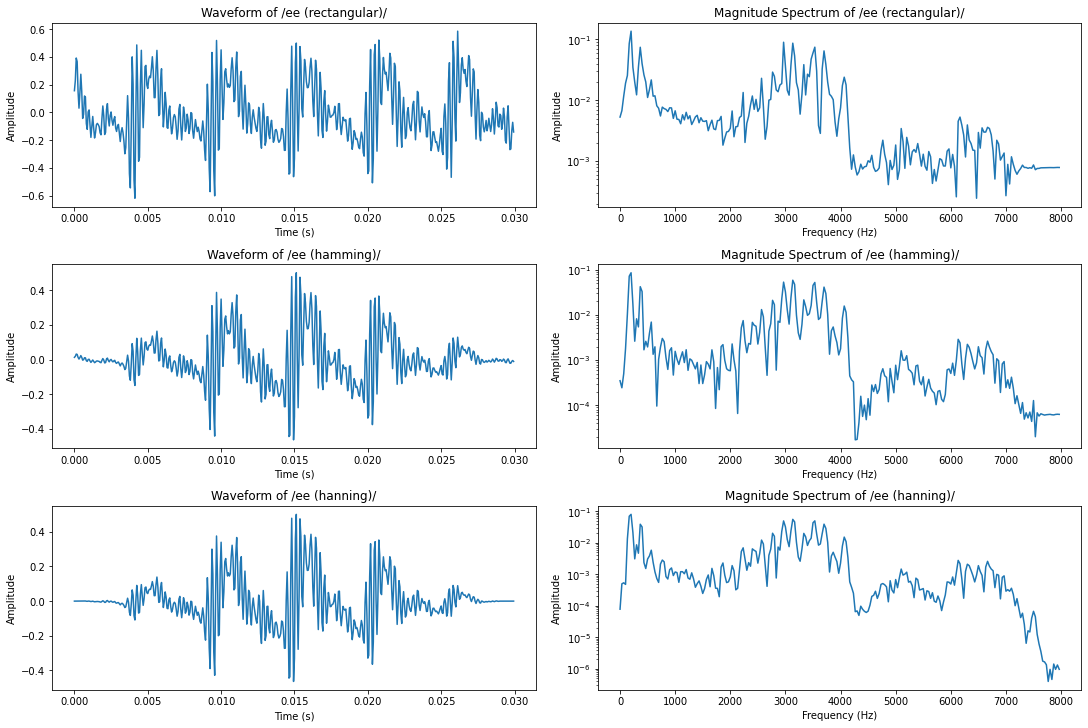

In [ ]:
plt.figure(figsize=(10,10))
fig, axs = plt.subplots(3, 2, figsize=(15,10), constrained_layout=True)
axs[0, 0].plot(t_ee, ee_rect)
axs[0, 0].set_title('Waveform of /ee (rectangular)/')
axs[0, 0].set(xlabel = 'Time (s)', ylabel = 'Amplitude')
axs[0, 1].plot(f_ee_rect, fft_ee_rect)
axs[0, 1].set_title('Magnitude Spectrum of /ee (rectangular)/')
axs[0, 1].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude', yscale = 'log')

axs[1, 0].plot(t_ee, ee_hamming)
axs[1, 0].set_title('Waveform of /ee (hamming)/')
axs[1, 0].set(xlabel = 'Time (s)', ylabel = 'Amplitude')
axs[1, 1].plot(f_ee_hamm, fft_ee_hamm)
axs[1, 1].set_title('Magnitude Spectrum of /ee (hamming)/')
axs[1, 1].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude', yscale = 'log')

axs[2, 0].plot(t_ee, ee_hanning)
axs[2, 0].set_title('Waveform of /ee (hanning)/')
axs[2, 0].set(xlabel = 'Time (s)', ylabel = 'Amplitude')
axs[2, 1].plot(f_ee_hann, fft_ee_hann)
axs[2, 1].set_title('Magnitude Spectrum of /ee (hanning)/')
axs[2, 1].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude', yscale = 'log')

In [ ]:
# We now take 3 different frame sizes
# frame size = 3 ms, 30 ms, 300 ms
# ee sound => 0.460 s

ee_3ms = audio[int((0.460-0.0015)*fs):int((0.460+0.0015)*fs)]
ee_30ms = audio[int((0.460-0.015)*fs):int((0.460+0.015)*fs)]
ee_300ms = audio[int((0.460-0.15)*fs):int((0.460+0.15)*fs)]
t_ee_3ms = np.arange(0, ee_3ms.shape[0]/fs, 1/fs)
t_ee_30ms = np.arange(0, ee_30ms.shape[0]/fs, 1/fs)
t_ee_300ms = np.arange(0, ee_300ms.shape[0]/fs, 1/fs)

In [ ]:
f_ee_3ms, fft_ee_3ms = plot_spectrum(ee_3ms, "ee", type='none')
f_ee_30ms, fft_ee_30ms = plot_spectrum(ee_30ms, "ee", type='none')
f_ee_300ms, fft_ee_300ms = plot_spectrum(ee_300ms, "ee", type='none')

[None, Text(0, 0.5, 'Amplitude'), Text(0.5, 0, 'Frequency (Hz)')]

<Figure size 720x720 with 0 Axes>

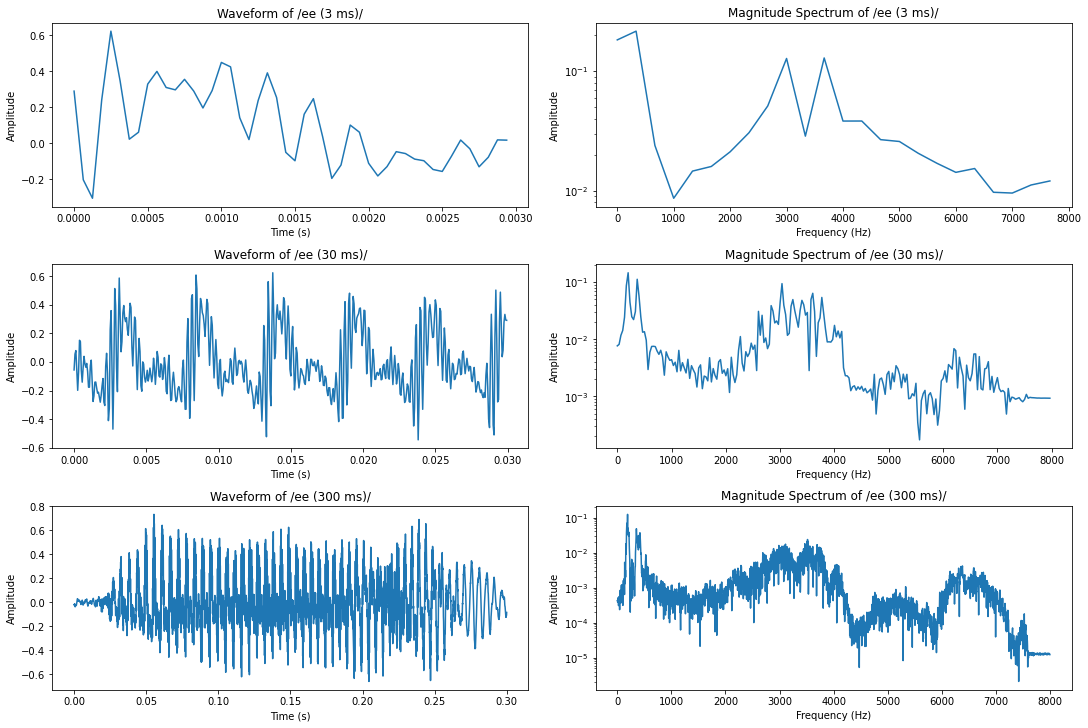

In [ ]:
plt.figure(figsize=(10,10))
fig, axs = plt.subplots(3, 2, figsize=(15,10), constrained_layout=True)
axs[0, 0].plot(t_ee_3ms, ee_3ms)
axs[0, 0].set_title('Waveform of /ee (3 ms)/')
axs[0, 0].set(xlabel = 'Time (s)', ylabel = 'Amplitude')
axs[0, 1].plot(f_ee_3ms, fft_ee_3ms)
axs[0, 1].set_title('Magnitude Spectrum of /ee (3 ms)/')
axs[0, 1].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude', yscale = 'log')

axs[1, 0].plot(t_ee_30ms, ee_30ms)
axs[1, 0].set_title('Waveform of /ee (30 ms)/')
axs[1, 0].set(xlabel = 'Time (s)', ylabel = 'Amplitude')
axs[1, 1].plot(f_ee_30ms, fft_ee_30ms)
axs[1, 1].set_title('Magnitude Spectrum of /ee (30 ms)/')
axs[1, 1].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude', yscale = 'log')

axs[2, 0].plot(t_ee_300ms, ee_300ms)
axs[2, 0].set_title('Waveform of /ee (300 ms)/')
axs[2, 0].set(xlabel = 'Time (s)', ylabel = 'Amplitude')
axs[2, 1].plot(f_ee_300ms, fft_ee_300ms)
axs[2, 1].set_title('Magnitude Spectrum of /ee (300 ms)/')
axs[2, 1].set(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude', yscale = 'log')

### **Observations**
1. We observe that the windowed signals (especially with Hanning window) have widened peaks. We expect the side lobes to reduce in magnitude in such a case, although it is not observable due to wide range of frequency content. 
2. When we take different frame sizes for rectangular window, we observe that 3 ms signal has very less number of samples and hence the resolution reduces in teh frequency domain as well. 
3. In case of 30 ms and 300 ms we have much more samples and higher resolution in the frequency domain as well.